<a href="https://colab.research.google.com/github/zkibnksmh/MachineLearningTasks/blob/main/2ndWeekTask/Polynomial_Regression_Economic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Tentukan path file dataset di Google Drive
path = '/content/drive/MyDrive/Dataset/EconomiesOfScale.csv'

# Baca dataset menggunakan pandas
df = pd.read_csv(path)

# Tampilkan beberapa baris pertama dari dataset
df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [4]:
df

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [6]:
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

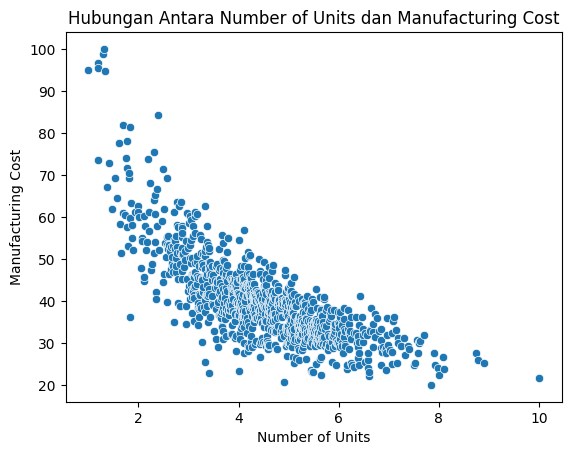

In [8]:
sns.scatterplot(data=df, x="Number of Units", y="Manufacturing Cost")

# Membuat scatter plot
plt.title('Hubungan Antara Number of Units dan Manufacturing Cost')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.show()

In [9]:
#Variabel Dependen
x = df["Number of Units"]

#Variabel Independen
y = df["Manufacturing Cost"]

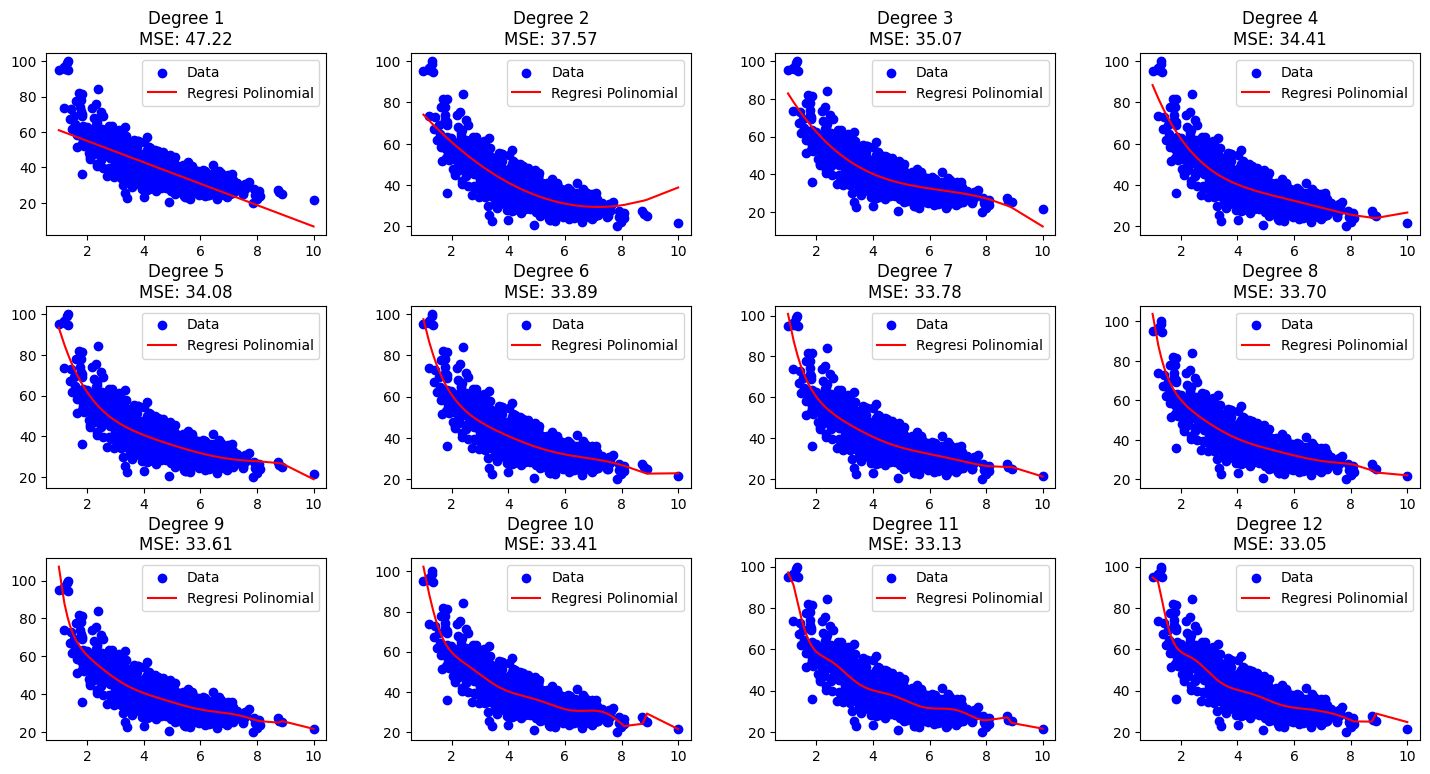

Degree 1: MSE = 47.22
Degree 2: MSE = 37.57
Degree 3: MSE = 35.07
Degree 4: MSE = 34.41
Degree 5: MSE = 34.08
Degree 6: MSE = 33.89
Degree 7: MSE = 33.78
Degree 8: MSE = 33.70
Degree 9: MSE = 33.61
Degree 10: MSE = 33.41
Degree 11: MSE = 33.13
Degree 12: MSE = 33.05


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

#memberikan array derajat polinomial yang diujikan
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#membuat tata letak subplot yang akan digunakan untuk menampilkan hasil dari regresi polinomial dengan derajat yang berbeda
fig, axes = plt.subplots(3, 4, figsize=(15, 8))
fig.tight_layout(pad=3.0)

# Menginisialisasi variabel untuk menyimpan nilai-nilai MSE
mse_values = []

for i, degree in enumerate(degrees):
    # Membuat objek PolynomialFeatures dengan derajat tertentu
    polynomial_features = PolynomialFeatures(degree=degree)

    # Mengubah fitur independen 'x' menjadi bentuk polinomial
    x_poly = polynomial_features.fit_transform(x.values.reshape(-1, 1))

    # Melatih model regresi linier pada fitur polinomial
    model = LinearRegression()
    model.fit(x_poly, y)

    # Memprediksi hasil
    y_pred = model.predict(x_poly)

    # Menghitung MSE (Mean Squared Error)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Plot hasil regresi polinomial
    ax = axes[i // 4, i % 4]
    ax.scatter(x, y, label='Data', color='blue')
    ax.plot(x, y_pred, color='red', label='Regresi Polinomial')
    ax.set_title(f'Degree {degree}\nMSE: {mse:.2f}')
    ax.legend()

# Menampilkan plot
plt.show()

# Menampilkan hasil MSE dari setiap derajat
for degree, mse in zip(degrees, mse_values):
    print(f'Degree {degree}: MSE = {mse:.2f}')